# <center>Pizza Sales Analysis and EDA</center>

<img src="https://media.licdn.com/dms/image/D5612AQHKbjDnZ0Na8A/article-cover_image-shrink_720_1280/0/1694736293921?e=2147483647&v=beta&t=rz3dde0PSX9wgKHOxcPe7zGkpjTQxPicgnvXpNMUKd8" 
     width="700" 
     height="700" />

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('pizza_sales_dataset.csv')

In [88]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [90]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [91]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [92]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [93]:
df.shape

(48620, 12)

## Creating KPIS

In [94]:
# Total Revenue

total_revenue = df['total_price'].sum()
total_revenue

817860.05

In [95]:
# Total Pizza Sold

total_pizza_sold = df['quantity'].sum()
total_pizza_sold

49574

In [96]:
# Total Orders

total = []
for i in df['order_id'].unique():
    total.append(i)
   
total_orders = len(total)
total_orders

21350

In [97]:
# Average Order Value

average_order_value = total_revenue/total_orders
average_order_value

38.30726229508197

In [98]:
# Average Pizza Sold Per Order

average_pizza_sold_po = total_pizza_sold/total_orders
average_pizza_sold_po

2.321967213114754

## EDA

C:\Users\DataTrained\AppData\Local\Temp\ipykernel_19268\2699499792.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


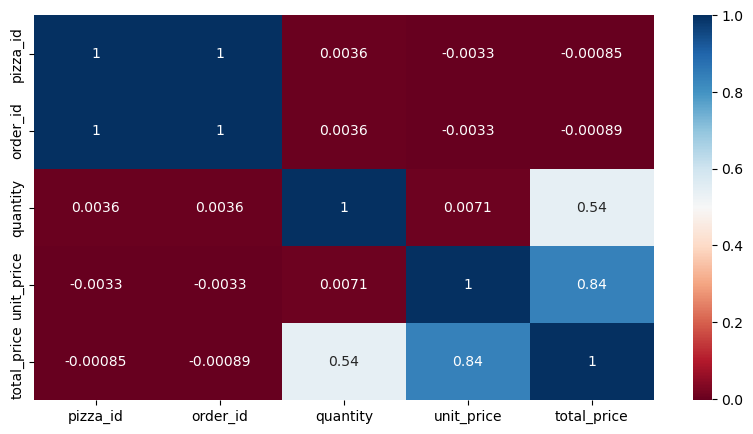

In [99]:
# creating heatmap

plt.figure(figsize = (10,5))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

* Insights
- 

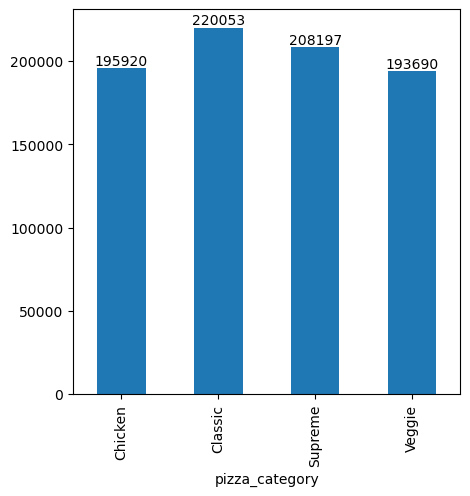

In [101]:
# Total Revenue by Pizza Category

plt.figure(figsize = (5,5))
pc = df.groupby(['pizza_category'])['total_price'].agg('sum').plot(kind='bar')

for bars in pc.containers:
    pc.bar_label(bars)

* Insights
- 

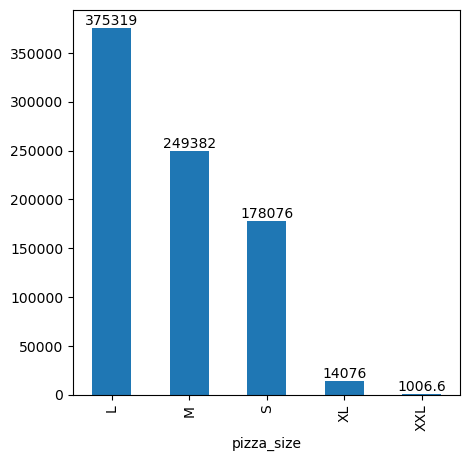

In [102]:
# Total Revenue by Pizza Size

plt.figure(figsize = (5,5))
pc = df.groupby(['pizza_size'])['total_price'].agg('sum').plot(kind='bar')

for bars in pc.containers:
    pc.bar_label(bars)

* Insights
- 

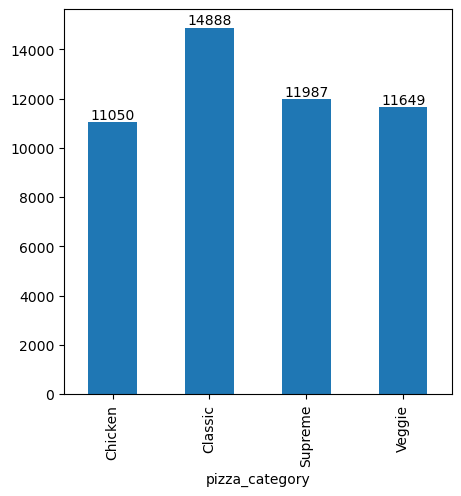

In [103]:
# Total Pizza Sold(Total Quantity) by Pizza Category

plt.figure(figsize = (5,5))
pc = df.groupby(['pizza_category'])['quantity'].agg('sum').plot(kind='bar')

for bars in pc.containers:
    pc.bar_label(bars)

* Insights
- 

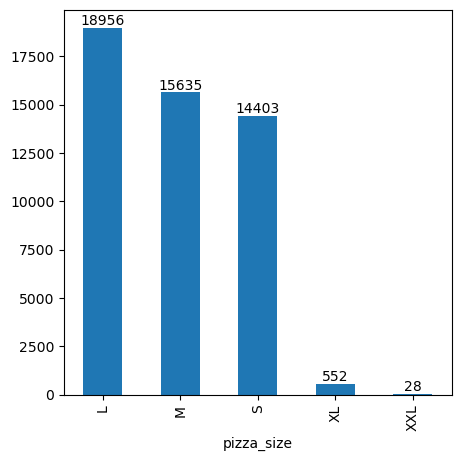

In [104]:
# Total Pizza Sold(Total Quantity) by Pizza Size

plt.figure(figsize = (5,5))
pc = df.groupby(['pizza_size'])['quantity'].agg('sum').plot(kind='bar')

for bars in pc.containers:
    pc.bar_label(bars)

* Insights
- 

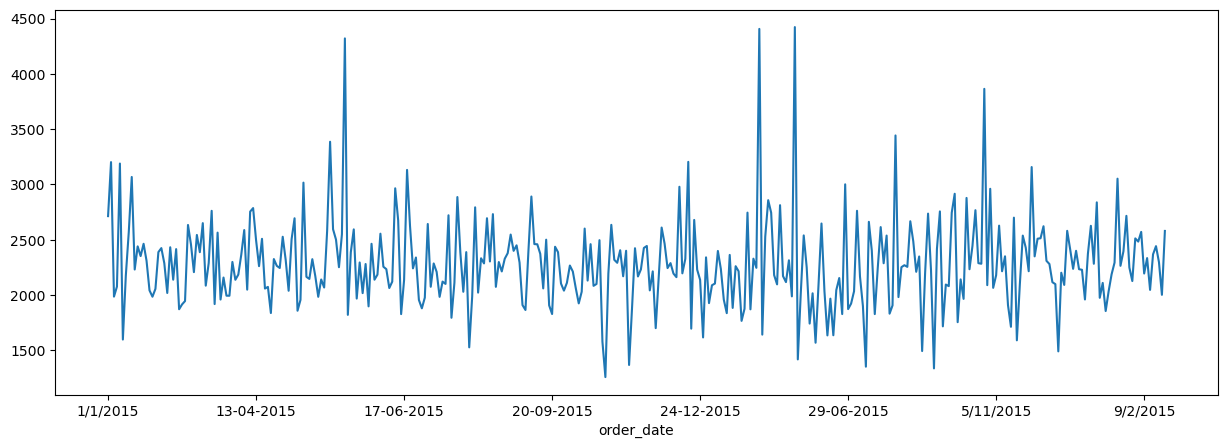

In [105]:
# Total Revenue By Order Date

plt.figure(figsize = (15,5))
pc = df.groupby(['order_date'])['total_price'].agg('sum').plot(kind='line')

* Insights
-

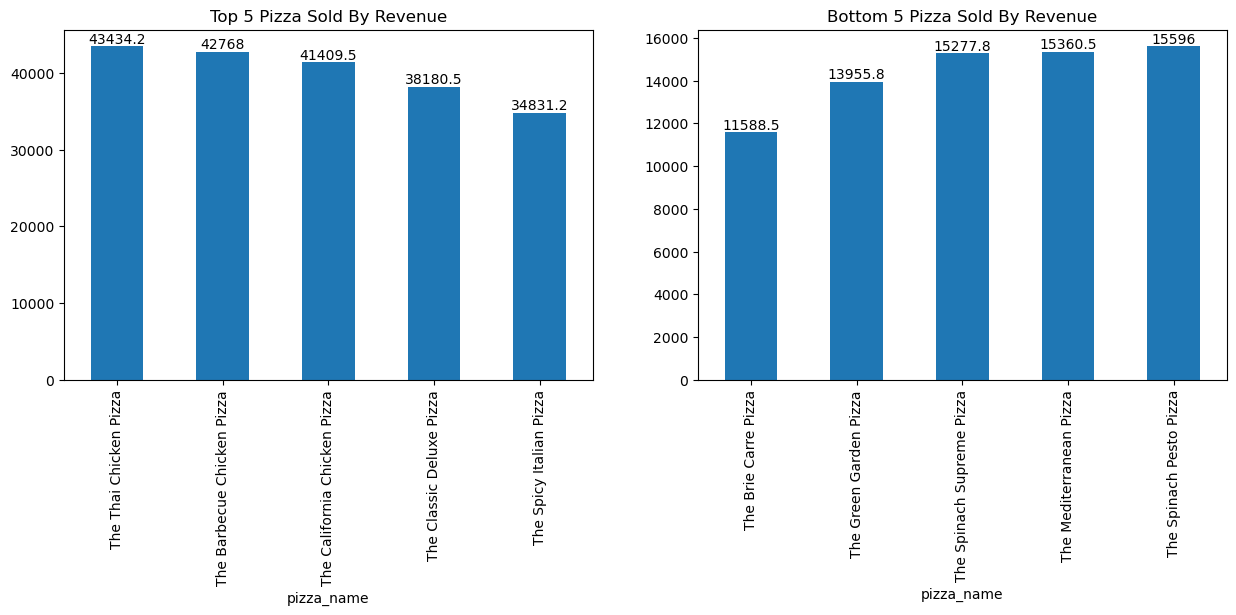

In [106]:
# Top & Bottom 5 Pizzas By Revenue

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)

pc = df.groupby(['pizza_name'])['total_price'].agg('sum').nlargest(5).plot(kind='bar',title='Top 5 Pizza Sold By Revenue')

for bars in pc.containers:
    pc.bar_label(bars)

plt.subplot(2,2,2)

pc = df.groupby(['pizza_name'])['total_price'].agg('sum').nsmallest(5).sort_values(ascending=True).plot(kind='bar',title='Bottom 5 Pizza Sold By Revenue')

for bars in pc.containers:
    pc.bar_label(bars)

* Insights
- 

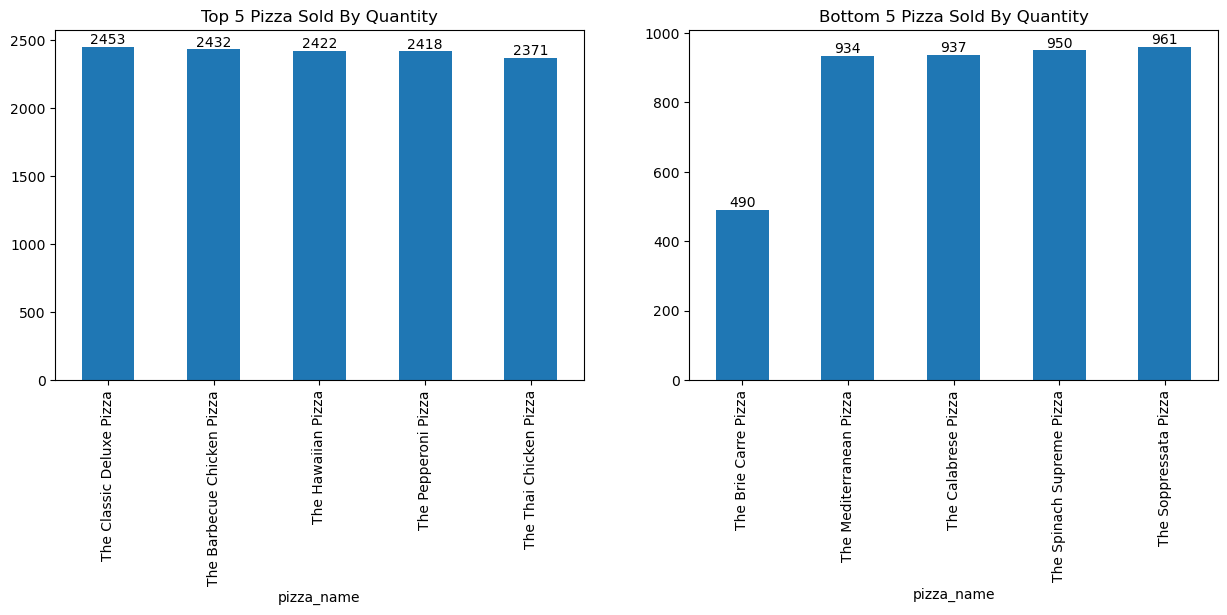

In [107]:
# Top & Bottom 5 Pizzas By Quantity

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)

pc = df.groupby(['pizza_name'])['quantity'].agg('sum').nlargest(5).plot(kind='bar',title='Top 5 Pizza Sold By Quantity')

for bars in pc.containers:
    pc.bar_label(bars)

plt.subplot(2,2,2)

pc = df.groupby(['pizza_name'])['quantity'].agg('sum').nsmallest(5).sort_values(ascending=True).plot(kind='bar',title='Bottom 5 Pizza Sold By Quantity')

for bars in pc.containers:
    pc.bar_label(bars)

* Insights
- 

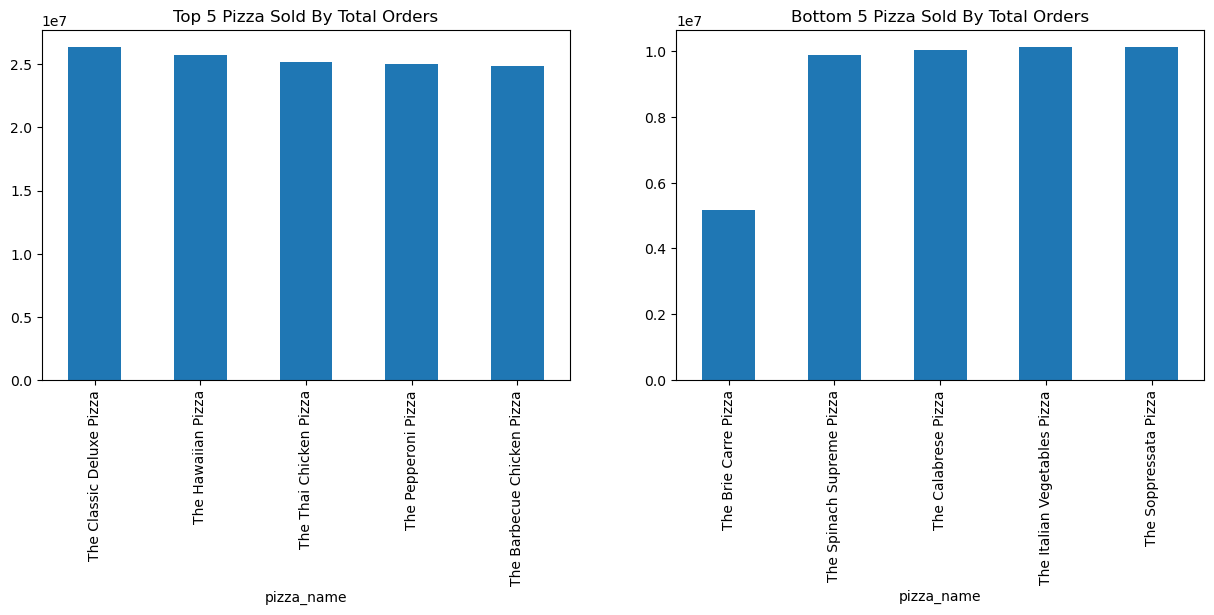

In [108]:
# Top & Bottom 5 Pizzas By Total Order

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)

pc = df.groupby(['pizza_name'])['order_id'].agg('sum').nlargest(5).plot(kind='bar',title='Top 5 Pizza Sold By Total Orders')

plt.subplot(2,2,2)

pc = df.groupby(['pizza_name'])['order_id'].agg('sum').nsmallest(5).sort_values(ascending=True).plot(kind='bar',title='Bottom 5 Pizza Sold By Total Orders')

* Insights
- 

## Conclusion

-